# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [1]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [2]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


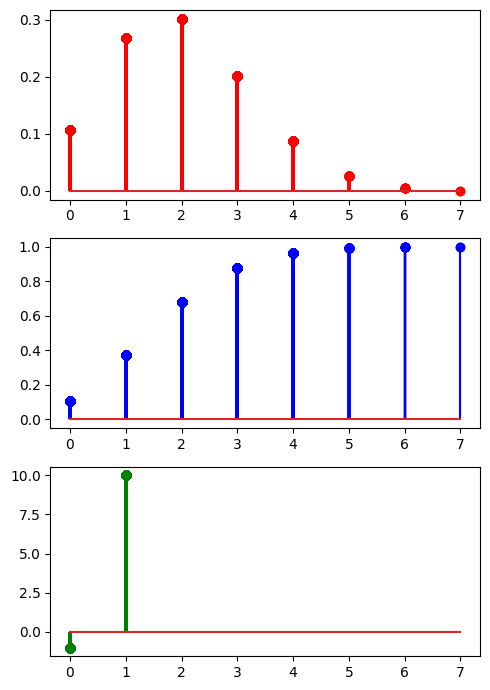

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

### Normal Distribution

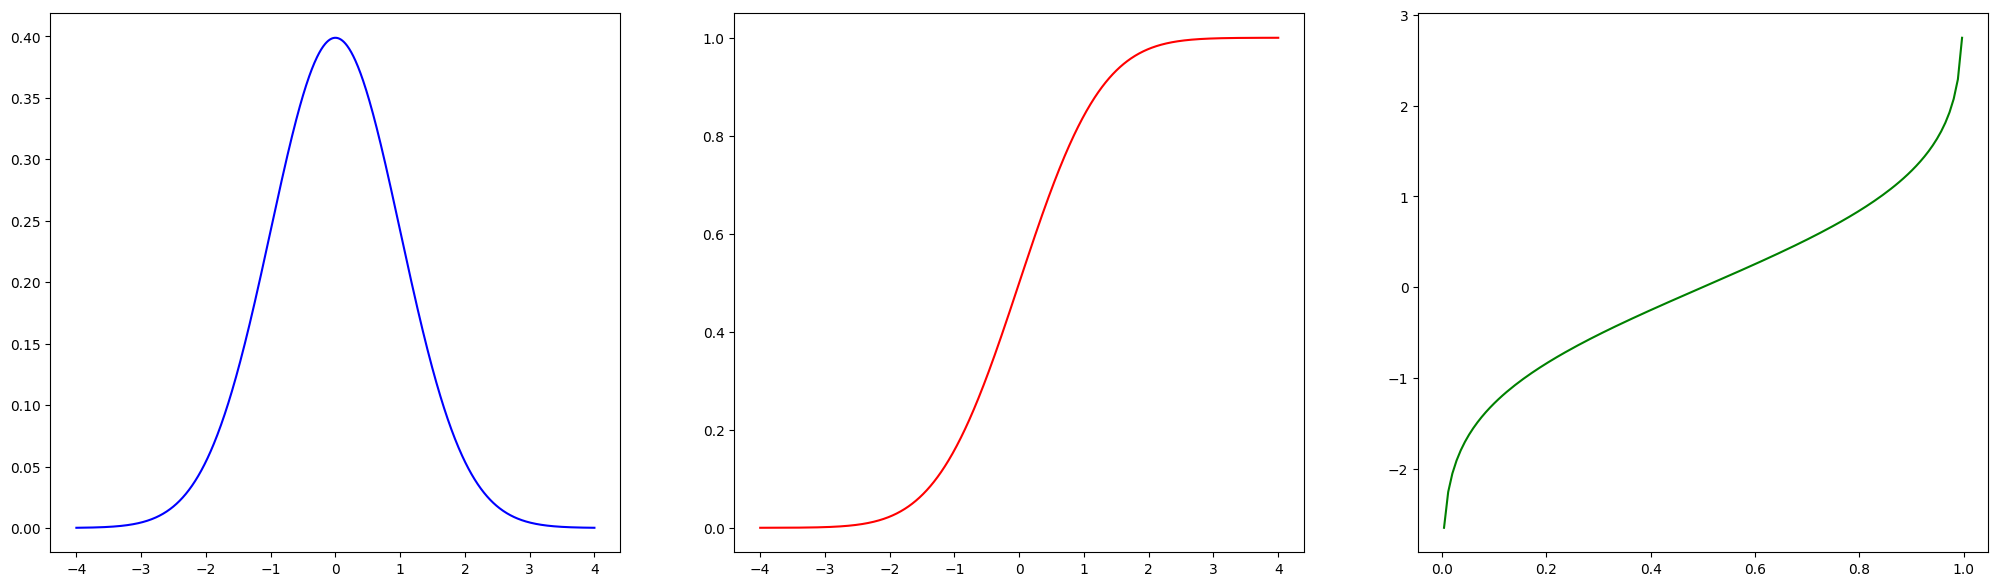

In [32]:
from scipy.stats import norm # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore

# @params density_normal_dist():
    # valores - Los valores en los que se quiere evaluar la pdf
    # mean - La media de la distribucion normal
    # std - La desviacion estandar de la distrbucion normal
def density_normal_dist(valores, mean, std):
    result = norm.pdf(valores, loc = mean, scale = std)
    return result


# @params quantile_normal_dist():
    # valores - En este caso los valores que le pasamos `q` sera el valor del cuartil
    # mean - La media de la distribucion
    # std - La desviacion estandar de la distribucion
def quantile_normal_dist(valores, mean, std):
    result = norm.ppf(q = valores, loc = mean, scale = std)
    return result

# @params cumulative_normal_distribution():
    # valores - Valores en los que se evalua la CDF
    # mean - La media de la distribucion
    # std - La desviacion estandar de la distribucion
def cumulative_normal_distribution(valores, mean, std):
    result = norm.cdf(x = valores, loc = mean, scale = std)
    return result

# Definimos una funcion `random_normal_dist` que genera variables aleatorias a partir de una distribucion normal
# @params random_normal_dist():
    # n_variables - Numero de variables aleatorias que quiere generar
    # mean - La media de la distribucion normal
    # std - La desviacion estandar de la distribucion
def random_normal_dist(n_variables, mean, std):
    result = norm.rvs(size = n_variables, loc = mean, scale = std)
    return result

# Datos necesarios
mean = 0
std = 1
data = np.linspace(-4, 4, 1000)

pmf = density_normal_dist(data, mean = mean, std = std)
cdf = cumulative_normal_distribution(data, mean = mean, std = std)
ppf = quantile_normal_dist(data, mean = mean, std = std)

fig, axis = plt.subplots(1, 3, figsize = (25, 7))

axis[0].plot(data, pmf, 'b-')
axis[1].plot(data, cdf, 'r-')
axis[2].plot(data, ppf, 'g-')

plt.show()

### Uniform Distribution

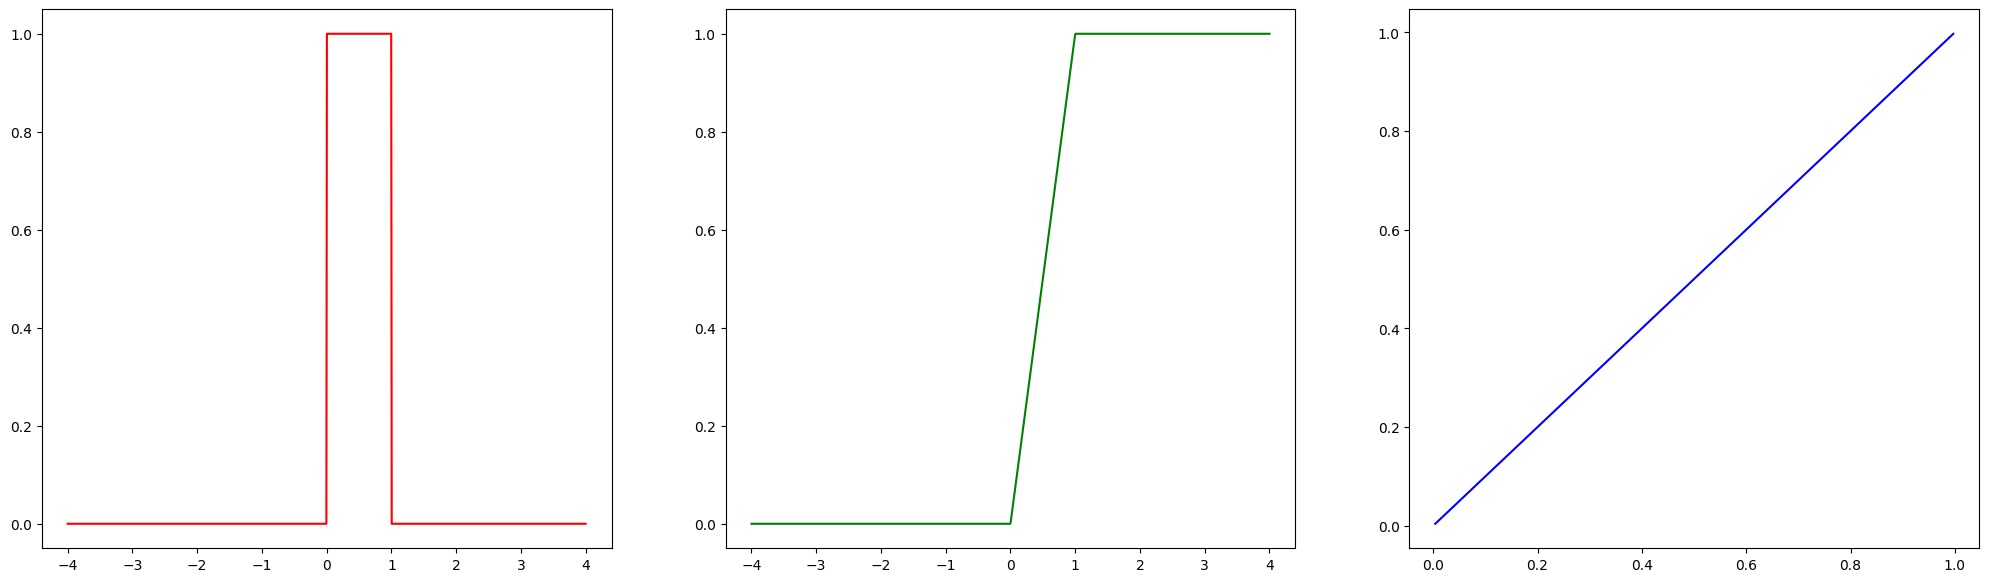

In [31]:
from scipy.stats import uniform # type: ignore

def calculate_uniform_pdf(x, low = 0, high = 1):
    # Params:
        # x - El valor en el que se ecalua la funcion de densidad de probabilidad
        # low - El limite inferior del intervalo. Por defecto 0
        # high - El limite superior del intervalo. Por defecto 1

    result = uniform.pdf(x, loc = low, scale = (high - low))
    return result

def calculate_uniform_cdf(q, low = 0, high = 1):
    # Params:
        # q - El valor en el que se evalua la funcion de dustribucion acumulativa
        # low - El limite inferior del intervalo. Por defecto 0
        # low - El limite superior del intervalo. Por defecto 1
    result = uniform.cdf(q, loc = low, scale = (high - low))
    return result

def calculate_uniform_quantile(p, low = 0, high = 1):
    # Params:
        # p - La probabilidad para la cual se calcular el cuantil
        # low - El limite inferior del intervalo
        # high - El limite superior del intervalo

    result = uniform.ppf(p, loc = low, scale = (high - low))
    return result

def generate_uniform_random_variable(n, low = 0, high = 1):
    # Params:
        # n - El numero de variables aleatorias a generar
        # low - El limite inferior del intervalo
        # high - El limite superior del intervalo

    result = uniform.rvs(size = n, loc = low, scale = (high - low))
    return result

# Datos necesarios
low = 0
high = 1
data = np.linspace(-4, 4, 1000)

pmf = calculate_uniform_pdf(data, low = low, high = high)
cdf = calculate_uniform_cdf(data, low = low, high = high)
ppf = calculate_uniform_quantile(data, low = low, high = high)

fig, axis = plt.subplots(1, 3, figsize = (25, 7))

axis[0].plot(data, pmf , 'r-')
axis[1].plot(data, cdf , 'g-')
axis[2].plot(data, ppf , 'b-')

plt.show()
